In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Importing CSV File**


In [23]:
df = pd.read_csv('CostReport.csv')

Rermoving unnecessary columns 

In [24]:
drop = [
    'Cash on Hand and in Banks',
    'Temporary Investments',
    'Notes Receivable',
    'Prepaid Expenses',
    'Inventory',
    'Land',
    'Land Improvements',
    'Buildings',
    'Leasehold Improvements',
    'Minor Equipment Depreciable',
    'Health Information Technology Designated Assets',
    'Total Fixed Assets',
    'Investments',
    'Other Assets',
    'Accounts Payable',
    'Payroll Taxes Payable',
    'Notes and Loans Payable (Short Term)',
    'Deferred Income',
    'Unsecured Loans',
    'Total Other Assets',
    'Total Fund Balances',
    'DRG Amounts Before October 1',
    'DRG Amounts After October 1',
    'Outlier Payments For Discharges',
    'Medicaid Charges',
    'Stand-Alone CHIP Charges'
]

In [34]:
clean= df.drop(columns=drop, errors='ignore')

In [35]:
clean.to_csv('CostReport.csv', index=False)

In [36]:
df.head()

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Patient Revenue,Less Total Operating Expense,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Net Revenue from Stand-Alone CHIP
0,717629,344028,STRATEGIC BEHAVIORAL CENTER - GARNER,3200 WATERFIELD ROAD,GARNER,NC,27529-7727,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,717969,180078,PAUL B. HALL REGIONAL MEDICAL CENTER,PAUL B. HALL REGIONAL MEDICAL CENTE,PAINTSVILLE,KY,41240,JOHNSON,99918.0,R,...,6182531.0,5548061.0,634470.0,2151392.0,2785862.0,15.0,2785847.0,0.074617,1114125.0,NaN
2,719460,520210,MARSHFIELD MEDICAL CENTER-EAU CLAIRE,2116 CRAIG ROAD,EAU CLAIRE,WI,54701,NaN,20740.0,U,...,61135683.0,65395344.0,-4259661.0,845990.0,-3413671.0,151877.0,-3565548.0,0.451411,14333809.0,NaN
3,719475,63037,COBALT REHAB HOSP WESTMINSTER,6500 WEST 104TH AVE,WESTMINSTER,CO,80020,NaN,79740.0,U,...,671606.0,2651952.0,-1980346.0,NaN,-1980346.0,NaN,-1980346.0,NaN,NaN,NaN
4,721379,340123,AMERICAN HEALTHCARE SYSTEMS,373 NORTH FAYETTEVILLE STREET,ASHEBORO,NC,27204-,RANDOLPH,24660.0,U,...,24492145.0,29740894.0,-5248749.0,-6661015.0,-11909764.0,NaN,-11909764.0,0.160752,1724073.0,NaN


In [28]:
df.shape

(6064, 91)

In [32]:
df.describe

<bound method NDFrame.describe of       rpt_rec_num  Provider CCN                         Hospital Name  \
0          717629        344028  STRATEGIC BEHAVIORAL CENTER - GARNER   
1          717969        180078  PAUL B. HALL REGIONAL MEDICAL CENTER   
2          719460        520210  MARSHFIELD MEDICAL CENTER-EAU CLAIRE   
3          719475         63037         COBALT REHAB HOSP WESTMINSTER   
4          721379        340123           AMERICAN HEALTHCARE SYSTEMS   
...           ...           ...                                   ...   
6059       776749        251325             COVINGTON COUNTY HOSPITAL   
6060       776764        330273                PUTNAM HOSPITAL CENTER   
6061       776821        453304              TEXAS CHILDRENS HOSPITAL   
6062       776830        520096   WHEATON FRANCISCAN HEALTHCARE - ALL   
6063       776832        520136  ASCENSION SE WISCONSIN HOSPITAL  INC   

                           Street Address         City State Code    Zip Code  \
0       

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 91 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   rpt_rec_num                                                              6064 non-null   int64  
 1   Provider CCN                                                             6064 non-null   int64  
 2   Hospital Name                                                            6064 non-null   object 
 3   Street Address                                                           6061 non-null   object 
 4   City                                                                     6064 non-null   object 
 5   State Code                                                               6064 non-null   object 
 6   Zip Code                                                                

In [31]:
df.isnull().sum()

rpt_rec_num                             0
Provider CCN                            0
Hospital Name                           0
Street Address                          3
City                                    0
                                     ... 
Total Other Expenses                 4286
Net Income                             90
Cost To Charge Ratio                 1464
Net Revenue from Medicaid            1679
Net Revenue from Stand-Alone CHIP    5078
Length: 91, dtype: int64

**EDA AND VISUALISATION**

Count of records per state

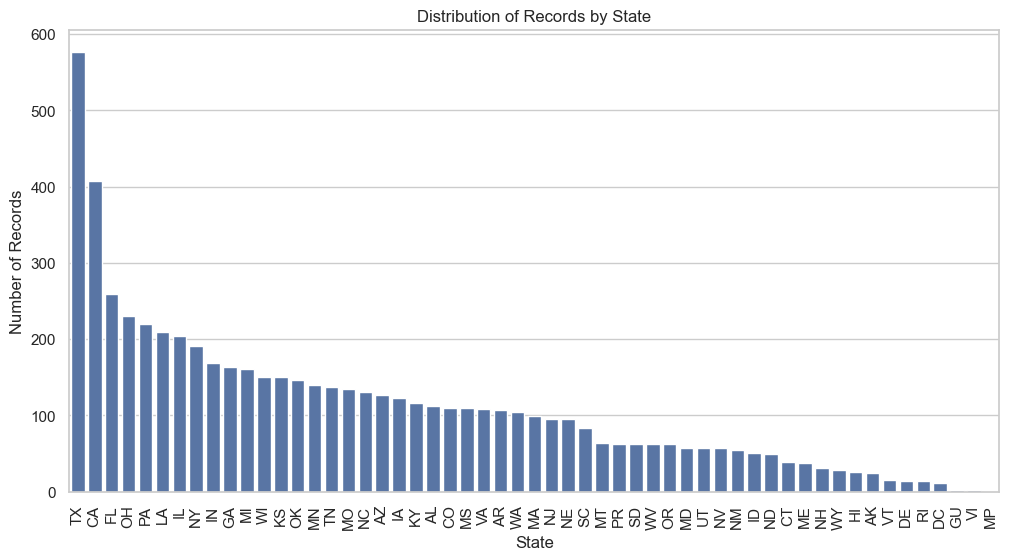

In [30]:
state_counts = df['State Code'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Distribution of Records by State')
plt.xlabel('State')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.show()

Net Patient Revenue by Year

In [47]:
print(df.columns[df.columns.str.contains("date", case=False)])

Index(['Fiscal Year Begin Date', 'Fiscal Year End Date'], dtype='object')


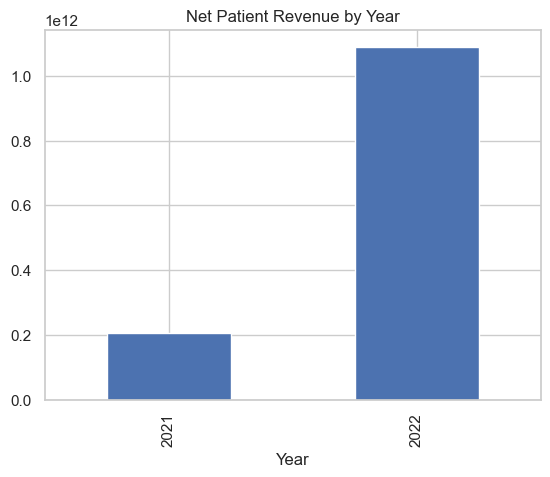

In [ ]:
df['Report Date'] = pd.to_datetime(df['Fiscal Year Begin Date'])
df['Year'] = df['Report Date'].dt.year
df.groupby('Year')['Net Patient Revenue'].sum().plot(kind='bar')
plt.title('Net Patient Revenue by Year')
plt.show()

Outliers of Net Patient Revevue , Net Income and Medicare CBSA Number


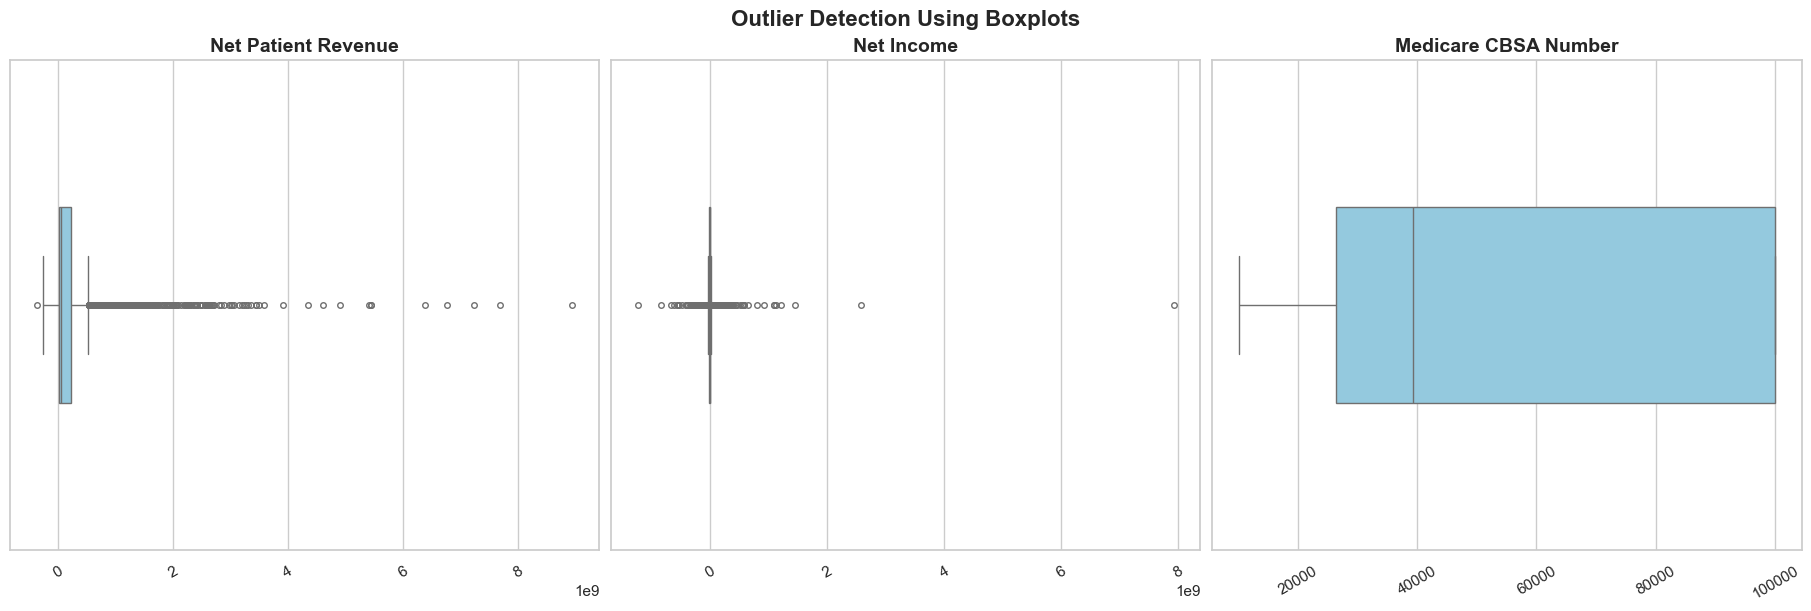

In [ ]:
sns.set(style="whitegrid")

cols_to_plot = ['Net Patient Revenue', 'Net Income', 'Medicare CBSA Number']

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(18, 6), constrained_layout=True)

for i, col in enumerate(cols_to_plot):
    if col in df.columns:
        sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue', width=0.4, fliersize=4)
        axes[i].set_title(f"{col}", fontsize=14, fontweight='bold')
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', rotation=30)

plt.suptitle("Outlier Detection Using Boxplots", fontsize=16, fontweight='bold')
plt.show()

Heatmap correlation


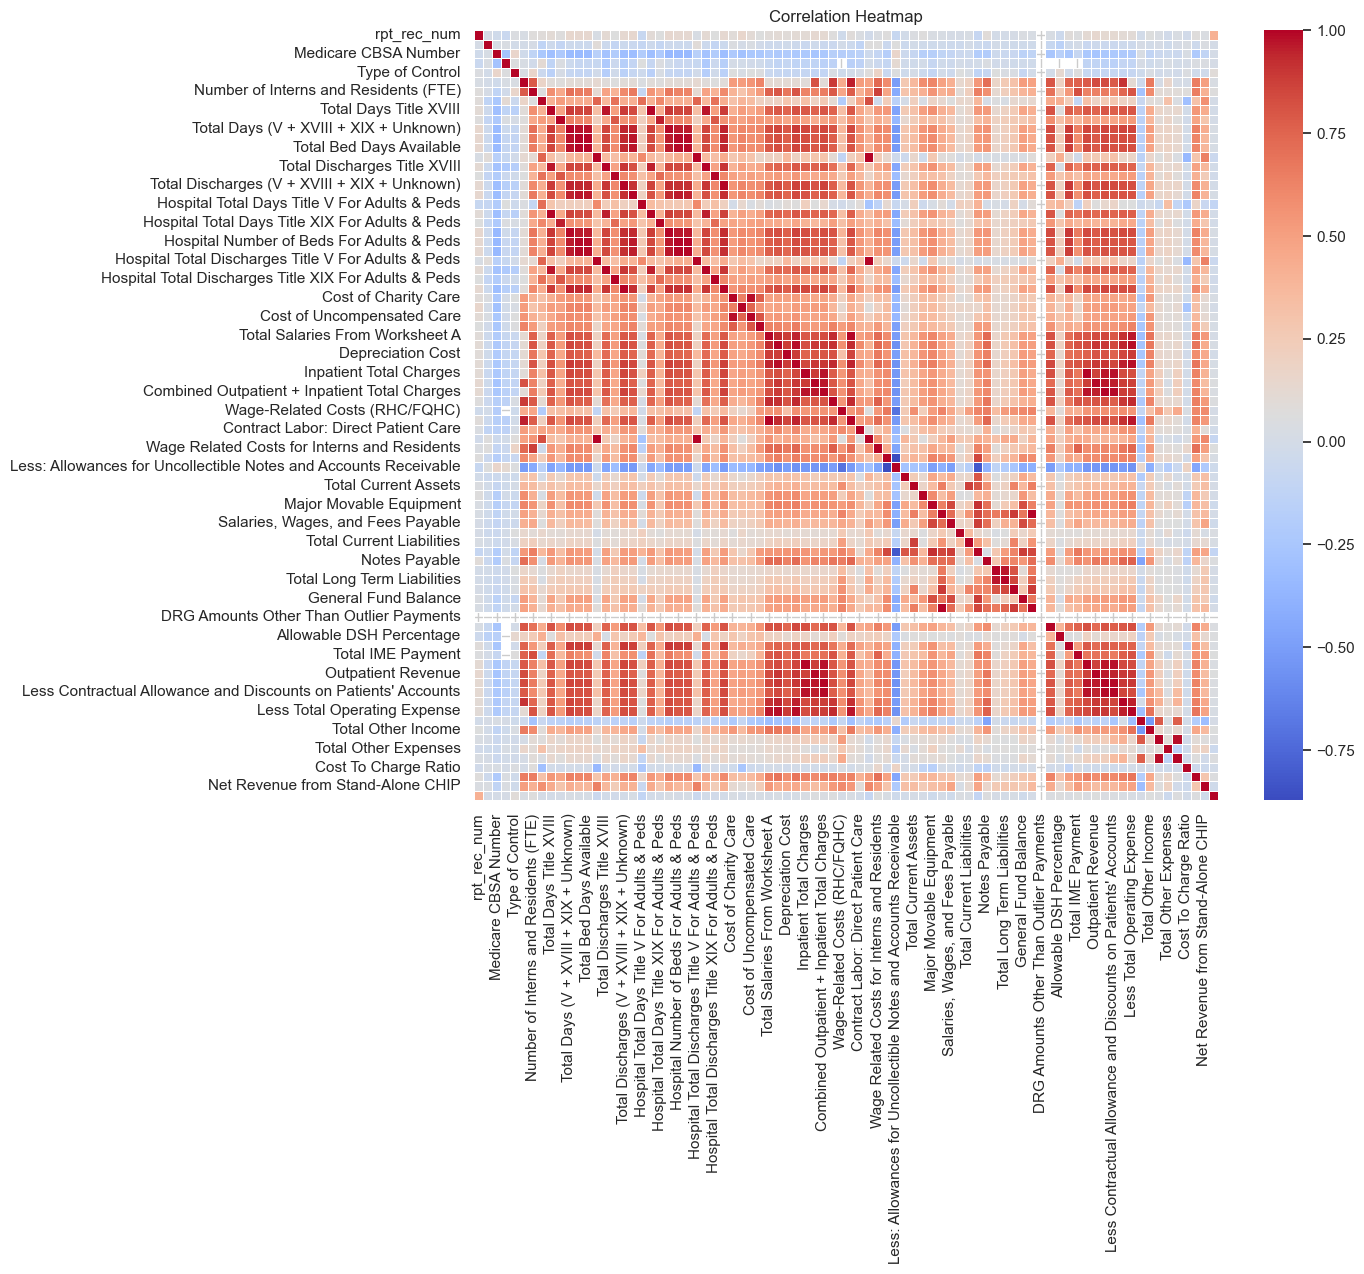

In [123]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Average Net Income by Fiscal Year

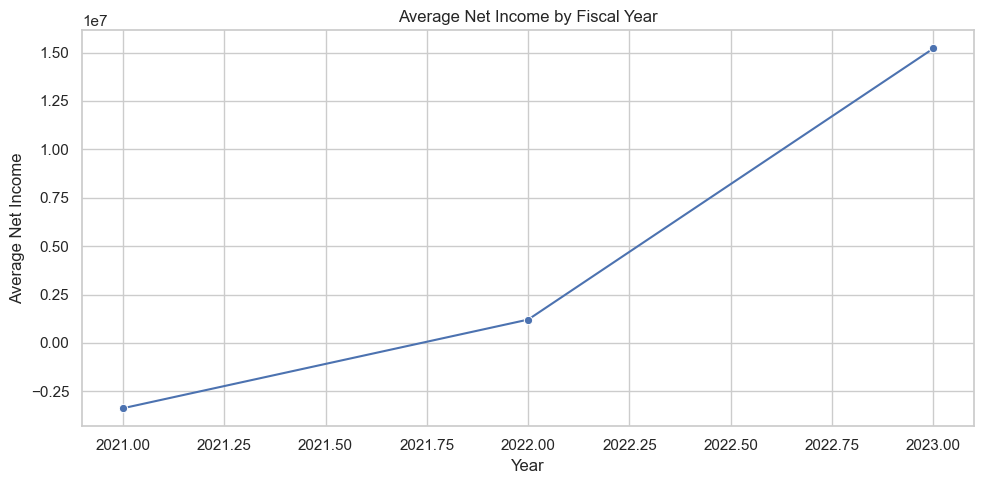

Fiscal Year End Date
2021   -3.372744e+06
2022    1.207735e+06
2023    1.521463e+07
Name: Net Income, dtype: float64

In [ ]:

df['Fiscal Year End Date'] = pd.to_datetime(df['Fiscal Year End Date'], errors='coerce')


if 'Net Income' in df.columns:
    df['Net Income'] = pd.to_numeric(df['Net Income'], errors='coerce')
    trend_df = df.groupby(df['Fiscal Year End Date'].dt.year)['Net Income'].mean().dropna()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=trend_df.index, y=trend_df.values, marker="o")
    plt.title("Average Net Income by Fiscal Year")
    plt.xlabel("Year")
    plt.ylabel("Average Net Income")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    trend_df = None

trend_df

Net Patient Revenue vs Net Income(Scatter plot)

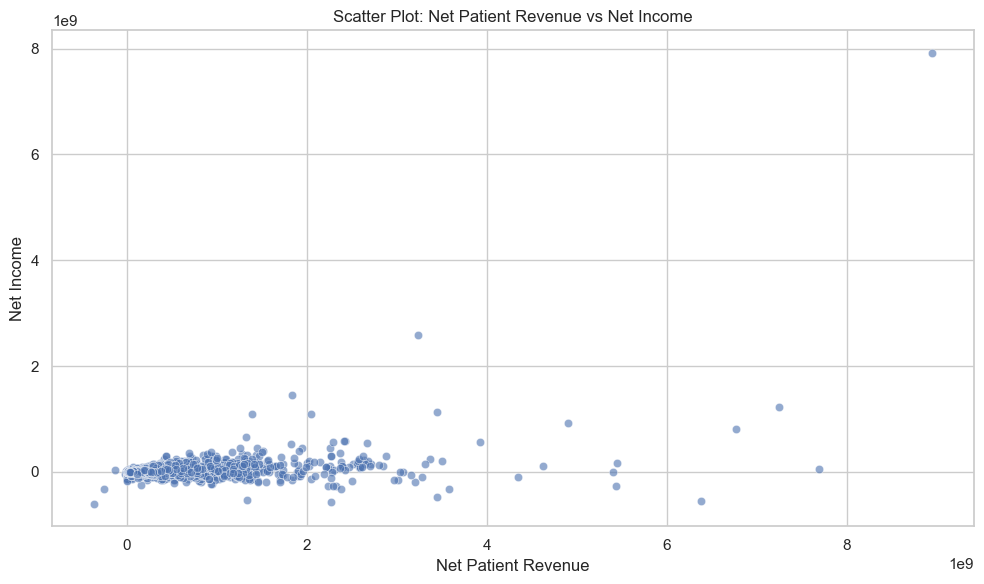

In [131]:
# Drop rows with missing values
df_scatter = df[['Net Patient Revenue', 'Net Income']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='Net Patient Revenue', y='Net Income', alpha=0.6)
plt.title('Scatter Plot: Net Patient Revenue vs Net Income')
plt.xlabel('Net Patient Revenue')
plt.ylabel('Net Income')
plt.grid(True)
plt.tight_layout()
plt.show()


Record Distribution by State (Top 15)

C:\Users\aryan\AppData\Local\Temp\ipykernel_17812\2965039454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


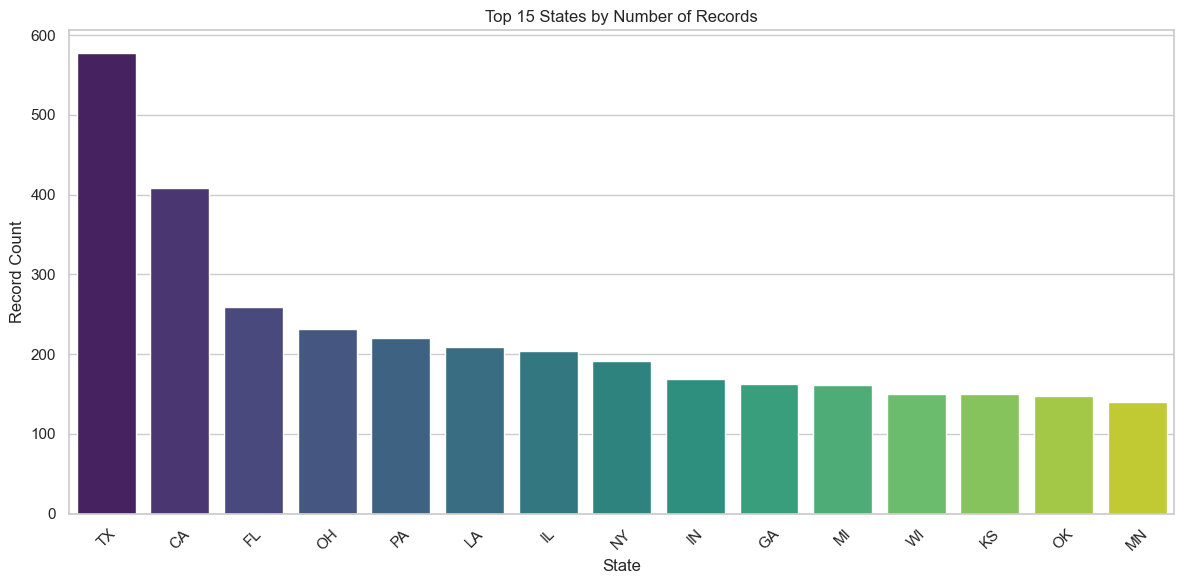

In [91]:
if 'State Code' in df.columns:
    plt.figure(figsize=(12, 6))
    state_counts = df['State Code'].value_counts().sort_values(ascending=False).head(15)
    sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
    plt.title("Top 15 States by Number of Records")
    plt.xlabel("State")
    plt.ylabel("Record Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Pie Chart of Records by State Code of top 10


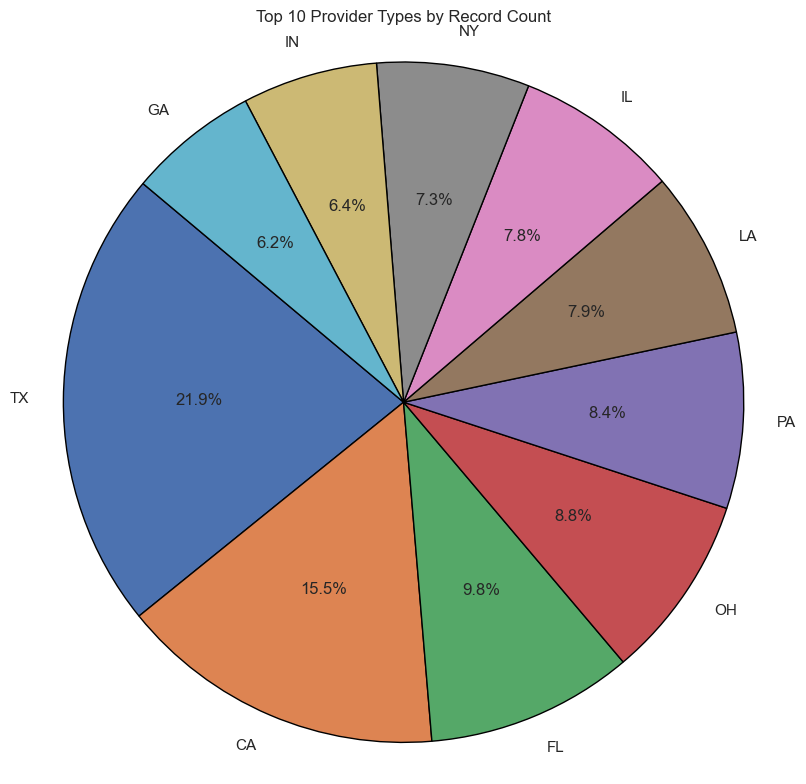

In [ ]:

if 'State Code' in df.columns:
    provider_counts = df['State Code'].value_counts().head(10)

    plt.figure(figsize=(8, 8))
    plt.pie(
        provider_counts.values,
        labels=provider_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title('Top 10 Provider Types by Record Count')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


 Donut Chart by 'type of control' of top 10

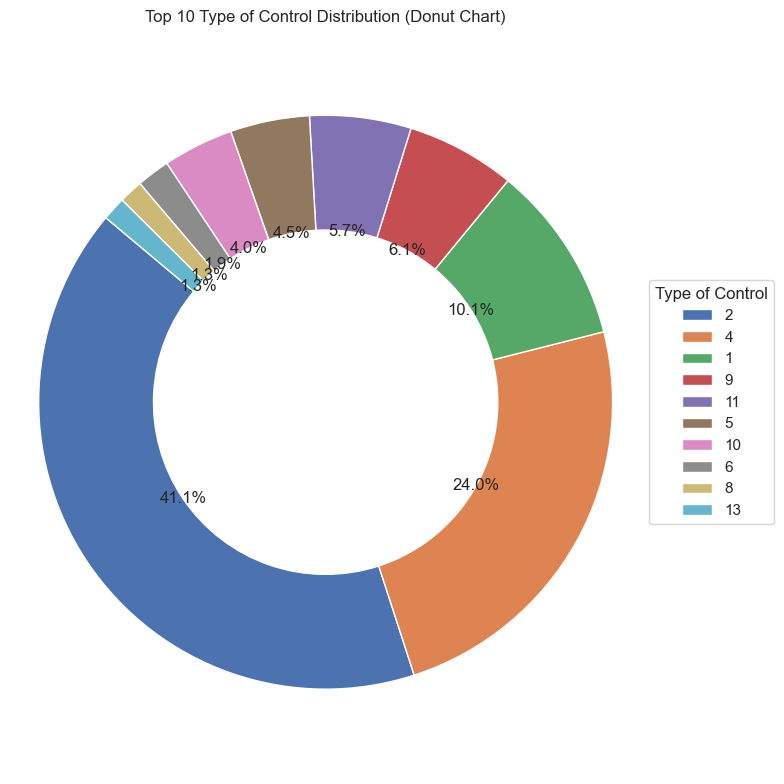

In [ ]:

col = 'Type of Control'

if col in df.columns:
    top_counts = df[col].value_counts().head(10)

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        top_counts.values,
        labels=None, 
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'width': 0.4, 'edgecolor': 'white'} 
    )
    plt.legend(
        wedges,
        top_counts.index,
        title=col,
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.title(f'Top 10 {col} Distribution (Donut Chart)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


**Prediction for 2024 & 2025**

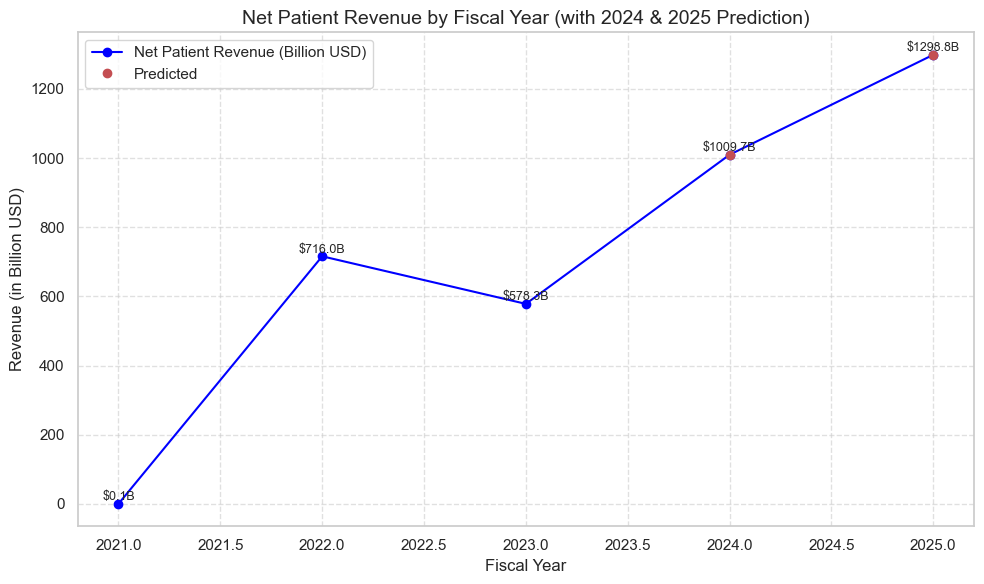

In [ ]:
df['Fiscal Year End Date'] = pd.to_datetime(df['Fiscal Year End Date'], errors='coerce')
df['Fiscal Year'] = df['Fiscal Year End Date'].dt.year

revenue_by_year = (
    df.groupby('Fiscal Year')['Net Patient Revenue']
    .sum()
    .dropna()
    .sort_index()
)

revenue_by_year
years = revenue_by_year.index.values.reshape(-1, 1)
revenues = revenue_by_year.values

# Train linear regression model
model = LinearRegression()
model.fit(years, revenues)

future_years = np.array([[2024], [2025]])
future_predictions = model.predict(future_years)

all_years = np.append(years.flatten(), future_years.flatten())
all_revenues = np.append(revenues, future_predictions)


plt.figure(figsize=(10, 6))
plt.plot(all_years, all_revenues / 1e9, marker='o', linestyle='-', color='blue', label='Net Patient Revenue (Billion USD)')


for x, y in zip(all_years, all_revenues):
    plt.text(x, y / 1e9 + 10, f"${y/1e9:.1f}B", ha='center', fontsize=9)


plt.plot(future_years, future_predictions / 1e9, 'ro', label='Predicted')


plt.title("Net Patient Revenue by Fiscal Year (with 2024 & 2025 Prediction)", fontsize=14)
plt.xlabel("Fiscal Year")
plt.ylabel("Revenue (in Billion USD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()